# <center>Лабораторная работа 4.8А. Резонанс Токов</center>

В данной работе изучается резонанс токов в колебательном контуре.  Предлагается снять при постоянном напряжении $U$ зависимости токов $I_L$ , $I_C$ и полного тока I от индуктивности катушки $L$ (глубины погружения сердечника), а также определить резонансные характеристики контура: полное сопротивление $R_{рез}$, добротность $Q$, активное сопротивление $r_L$ и индуктивность катушки $L$

В приципе, колебательный контура описывается одним уравнением  
$L\large \frac{d^2I}{dt^2} + \normalsize R\large \frac{dI}{dt} + \large \frac{I}{C} = -\normalsize \mathscr{E}\Omega sin\Omega t$,  
из которого с помощью метода комплексных амплитуд можно получить все необходимые нам формулы для определения резонансных характеристик контура (естественно, при резонансном токе):  
$Q = \large \frac{\rho}{r_L}$, где $\rho = \omega_0 L = \large \frac{1}{\omega_0 C} = \frac{\overline{L}}{C}$  
$R_{рез} = Q \cdot \rho$  
$I_{L, рез} = \large \frac{U_0}{\omega_0 L} = \frac{U_0}{\rho}$  
$I_{C, рез} = U_0 \omega_0 C = \large \frac{U_0}{\rho}$  
$I_{рез} = \large \frac{U_0}{Q \rho}$


## Установка

<img src="pic.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 15px;" />

Схема экспериментальной установки приведена на рис. 1. Напряжение от сети (220 В, 50 Гц) с помощью ЛАТРа через понижающий трансформатор Тр подаётся на параллельный контур, содержащий конденсатор ($C$ = 120 мкФ) и катушку, индуктивность которой зависит от глубины погружения сердечника. Полный ток
в цепи измеряется с помощью многопредельного амперметра $A1$; для измерения токов в $L$- и $C$-ветвях используются два одинаковых амперметра
$A2$ и $A3$; напряжение на контуре контролируется электронным вольтметром $V$ . Последовательно с контуром включён резистор $r$ — реостат с полным сопротивлением $\approx$ 100 Ом

## Ход работы

In [30]:
from math import pi
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
%matplotlib inline

In [36]:
name = "point1.csv"
R = 1.43 # Ом, сопротивление катушки
L_1 = 68.9 # мГн, при 1 кГц
R_1 = 33.0 # Ом, при 1 кГц
L_100 = 72.9 # мГн, при 100 Гц
R_100 = 2.5 # ом, при 100 Гц
v0 = 50 # Гц
U = 10 # В

При постоянном напряжении $U$ снимим зависимости $I$, $I_L$ и $I_C$ от координаты сердечника.

In [32]:
file = pd.read_csv(name)
file = file.T
file = file.drop(['I1', 'Unnamed: 5', 'Unnamed: 6'])
file = file.T
for col in file.columns:
    file[col] = [np.float64(i) for i in file[col]]
file

,"x, $см$","$I$, А","$I_L$, А","$I_C$, А"
0,0.0,0.290,0.18,0.46
1,1.0,0.255,0.21,0.47
2,2.0,0.220,0.24,0.47
3,3.0,0.175,0.26,0.46
4,4.0,0.135,0.31,0.47
5,5.0,0.050,0.35,0.47
6,6.0,0.000,0.41,0.48
7,7.0,0.000,0.47,0.48
8,8.0,0.000,0.54,0.47
9,9.0,0.165,0.63,0.47


Построим на одном графике зависимости $I$, $I_L$ и $I_C$ от индуктивночти (т.е. положения сердечника $x$) (График 1)

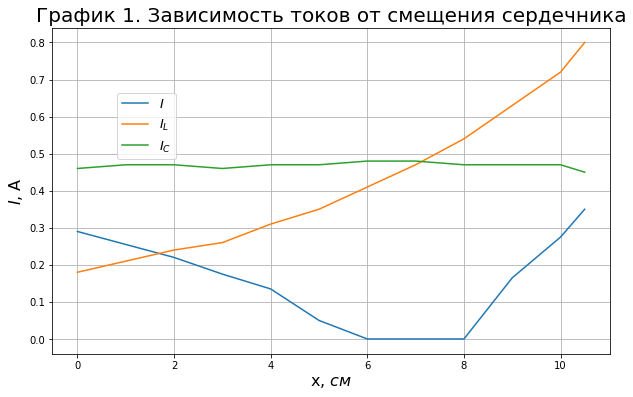

In [33]:
# График 1
x = np.array(file['x, $см$'])  # x
y1 = np.array(file['$I$, А'])  # I
y2 = np.array(file['$I_L$, А'])  # I_L
y3 = np.array(file['$I_C$, А'])  # I_C

fig = plt.figure(figsize=(10, 6))  # (Размер графика)
plt.title('График 1. Зависимость токов от смещения сердечника', fontsize=20)
plt.xlabel('x, $см$', fontdict=dict(size=16))
plt.ylabel('$I$, А', fontdict=dict(size=16))
plt.grid(True)  # сетка

plt.plot(x, y1, label='$I$');
plt.plot(x, y2, label='$I_L$');
plt.plot(x, y3, label='$I_C$');

# Вывести легенду
plt.legend(
    loc='upper left',
    borderaxespad=5,
    prop={'size': 13}
)

plt.show()

Как мы видим, резонанс достигается при $х= 7\spaceсм$ (Точка пересечания зеленого и ораньжевого графиков).
Теперь рассчитаем все параметры контура при резонансе.

In [39]:
p = np.float64(2 * pi * v0 * L_100 / 1000)
Q = np.float64(p/R_100)
R_res = 
print('Добротность контура:', Q.round(3))
print("Сопротивление при резонансе:", R_res, 'Ом')
print("Сопротивление измеренное с помощью омметра:", R, 'Ом')
p

Добротность контура: 9.161
Сопротивление при резонансе: 209.80449730077325 Ом
Сопротивление измеренное с помощью омметра: 1.43 Ом


22.902210444669596

In [37]:
L_r = U/(2*pi*v0*y2[7]) * 1000
print('Индуктивность при резонансе: ', L_r.round(2), 'мГн')
print('Измеренная с помощью моста: ', L_1, 'мГн')

Индуктивность при резонансе:  67.73 мГн
Измеренная с помощью моста:  68.9 мГн


## Заключение и выводы

Параметры системы при резонансе с хорошей точностью совпадают с измеренными с помощью моста Е7-8
Лабораторная работа выполнена студентами ~~ФИВТ~~ ФПМИ: Ваня Потяшин и Илья Ярлыков, Б05-814.